# <span style='color:RED'>LetsGrowMoreVIP - Data Science Internship - January 2022</span>


## Beginner Level Task-1 - Iris Flowers Classification ML Project 

## <span style='color:BLUE'> Author - Tanishq Kolhatkar</span>

### Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the iris dataset

In [2]:
data = pd.read_csv("iris.data", header=None) 
data.head() #first five rows of the dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail() #last five rows of the dataset

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data_headers = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
data.to_csv("Iris.csv", header=data_headers, index=False)

In [5]:
ndata = pd.read_csv("Iris.csv")
ndata.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Getting the Data info

In [6]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
ndata.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
ndata.isnull().sum() #checking for null data

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [9]:
ndata.groupby('Species').size() #checking size of each species

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Plotting

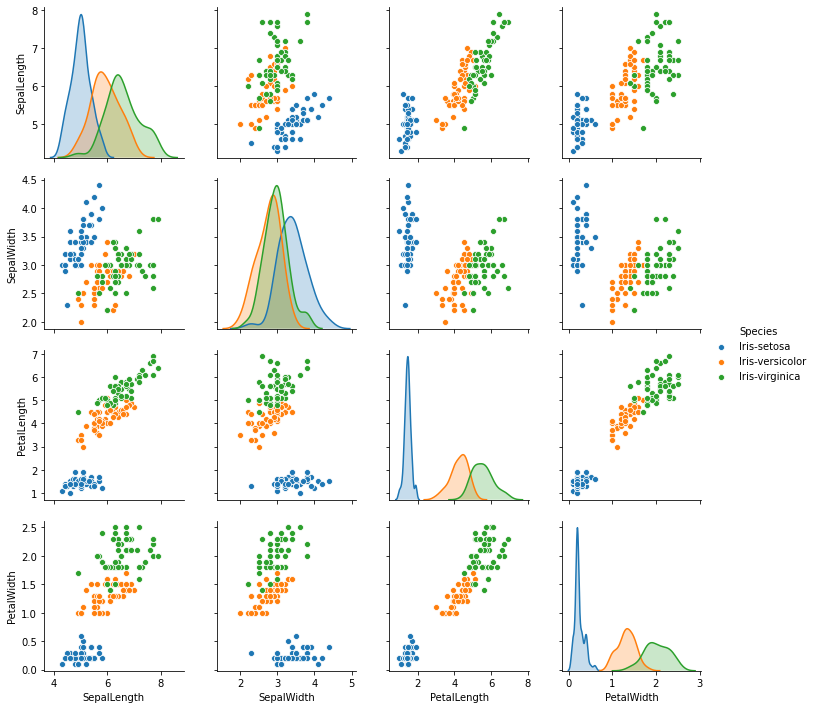

In [10]:
sns.pairplot(data = ndata, hue='Species')
plt.show()

### Comparison of each species with the features

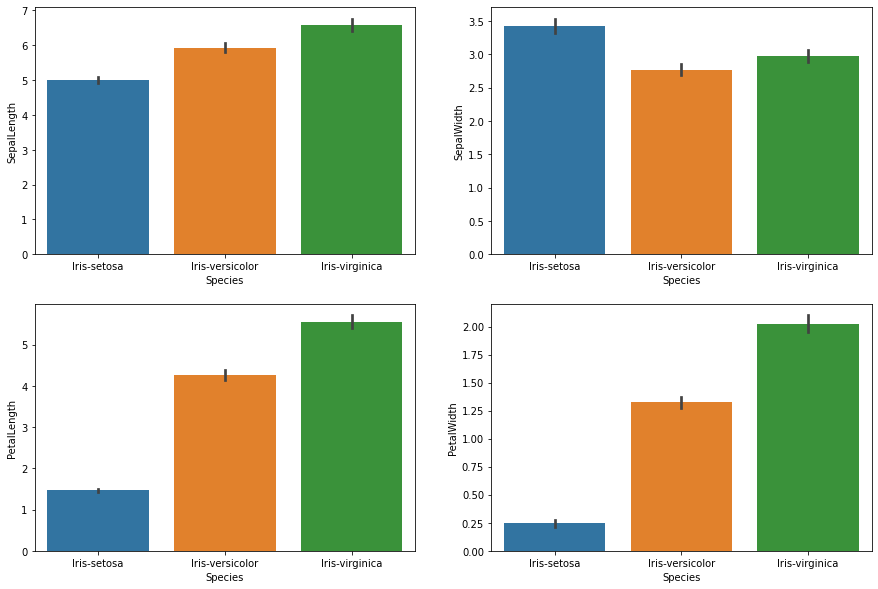

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLength', data = ndata)
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidth', data = ndata)
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLength', data = ndata)
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidth', data = ndata)

### Defining the dependent and independent variable

In [12]:
X = ndata.drop(columns="Species")
y = ndata["Species"]

### Splitting into training and testing dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Building the Model

#### Using the Random Forest Classifier Algorithm

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Making the confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


0.9666666666666667

### Conclusion

**Hence it can be concluded that Iris Flower Classification with Random Forest Model has an accuracy of approximately 96%**